In [16]:
import collections
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as sk

from sklearn import model_selection
from sklearn import *

import warnings
warnings.filterwarnings('ignore')

In [3]:
%matplotlib inline

# Data Prep

In [5]:
df = pd.read_csv("data/nba_1415.csv")

In [7]:
df2 = set(pd.read_csv("data/nba_1819.csv")['Player'])
df1 = df['Player']
names = [item for item, count in collections.Counter(df1).items() if count > 1]
labels = [1 if player in df2 else 0 for player in df1]
df['Survived'] = labels
df.head()
locations = [df.loc[df['Player'] == name] for name in names]
locations

[            Player     Season Season Type                Team  Games    Min  \
 244  Chris Johnson  2014-2015         REG               Bucks      1  20.83   
 292  Chris Johnson  2014-2015         REG  76ers, Jazz, Bucks     28  18.06   
 
       Pts  OReb  Dreb   Reb  ...   FGM   FGA    FG%  3PTM  3PTA   3PT%  FTM  \
 244  7.00  0.00  0.00  0.00  ...  3.00  5.00  0.600  1.00  3.00  0.333  0.0   
 292  5.68  0.29  1.68  1.96  ...  2.11  5.32  0.396  0.96  3.29  0.293  0.5   
 
       FTA    FT%  Survived  
 244  0.00  0.000         0  
 292  0.57  0.875         0  
 
 [2 rows x 25 columns],
             Player     Season Season Type            Team  Games    Min   Pts  \
 397  Quincy Miller  2014-2015         REG  Kings, Pistons      8  13.31  3.38   
 477  Quincy Miller  2014-2015         REG           Kings      2   6.61  1.00   
 
      OReb  Dreb   Reb  ...   FGM  FGA    FG%  3PTM  3PTA  3PT%   FTM   FTA  \
 397  0.38  1.75  2.13  ...  1.13  4.0  0.281  0.38  1.88   0.2  0.75  0.

# Data Exploration

In [8]:
df.head()

,Player,Season,Season Type,Team,Games,Min,Pts,OReb,Dreb,Reb,...,FGM,FGA,FG%,3PTM,3PTA,3PT%,FTM,FTA,FT%,Survived
0,Russell Westbrook,2014-2015,REG,Thunder,67,34.36,28.15,1.87,5.45,7.31,...,9.36,21.96,0.426,1.28,4.30,0.299,8.15,9.76,0.835,1
1,James Harden,2014-2015,REG,Rockets,81,36.80,27.37,0.93,4.74,5.67,...,7.99,18.15,0.440,2.57,6.85,0.375,8.83,10.17,0.868,1
2,Kevin Durant,2014-2015,REG,Thunder,27,33.80,25.41,0.59,6.00,6.59,...,8.81,17.30,0.510,2.37,5.89,0.403,5.41,6.33,0.854,1
3,LeBron James,2014-2015,REG,Cavaliers,69,36.14,25.26,0.75,5.30,6.06,...,9.04,18.55,0.488,1.74,4.93,0.353,5.43,7.65,0.710,1
4,Anthony Davis,2014-2015,REG,Pelicans,68,36.10,24.35,2.53,7.68,10.21,...,9.44,17.63,0.535,0.01,0.18,0.083,5.46,6.78,0.805,1


Remove the features that are not needed

In [9]:
df = df.drop(columns=['Season', 'Season Type', 'Team', 'Player'])
df.head()

,Games,Min,Pts,OReb,Dreb,Reb,Ast,Stl,Blk,TO,...,FGM,FGA,FG%,3PTM,3PTA,3PT%,FTM,FTA,FT%,Survived
0,67,34.36,28.15,1.87,5.45,7.31,8.58,2.09,0.21,4.39,...,9.36,21.96,0.426,1.28,4.30,0.299,8.15,9.76,0.835,1
1,81,36.80,27.37,0.93,4.74,5.67,6.98,1.90,0.74,3.96,...,7.99,18.15,0.440,2.57,6.85,0.375,8.83,10.17,0.868,1
2,27,33.80,25.41,0.59,6.00,6.59,4.07,0.89,0.93,2.74,...,8.81,17.30,0.510,2.37,5.89,0.403,5.41,6.33,0.854,1
3,69,36.14,25.26,0.75,5.30,6.06,7.39,1.58,0.71,3.94,...,9.04,18.55,0.488,1.74,4.93,0.353,5.43,7.65,0.710,1
4,68,36.10,24.35,2.53,7.68,10.21,2.19,1.47,2.94,1.40,...,9.44,17.63,0.535,0.01,0.18,0.083,5.46,6.78,0.805,1


In [10]:
def feature_visualization(name, values):
    print(f'Visualizing features for {name}')
    plt.boxplot(values)
    plt.show()

Visualizing features for Games


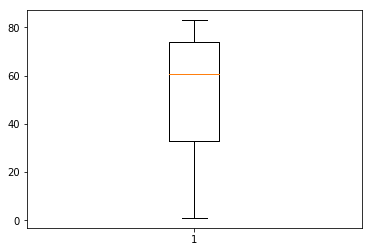

Visualizing features for Min


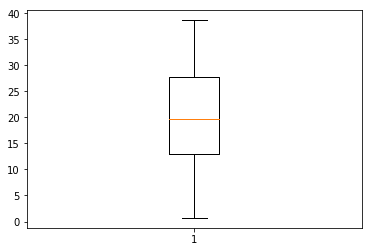

Visualizing features for Pts


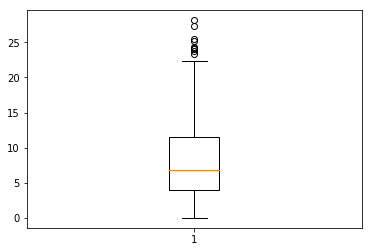

Visualizing features for OReb


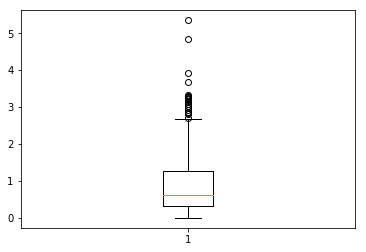

Visualizing features for Dreb


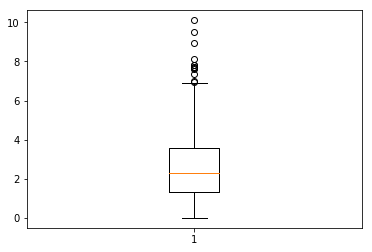

Visualizing features for Reb


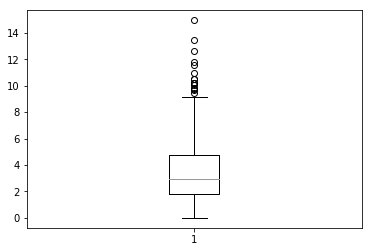

Visualizing features for Ast


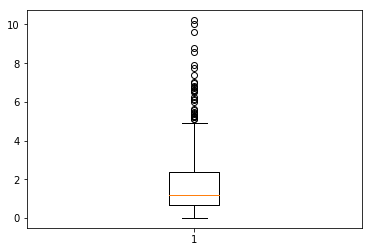

Visualizing features for Stl


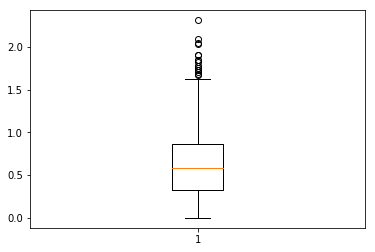

Visualizing features for Blk


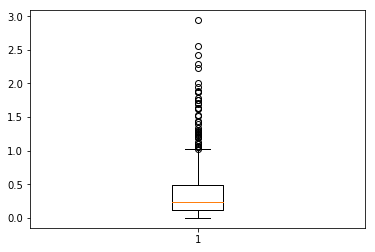

Visualizing features for TO


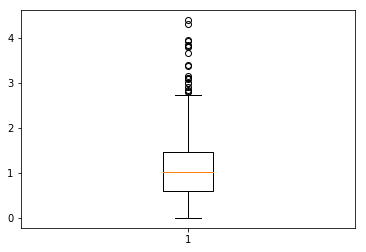

Visualizing features for PF


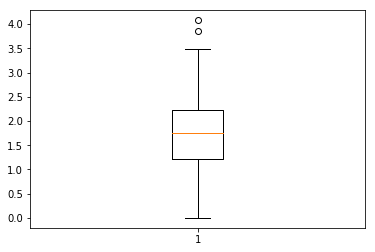

Visualizing features for FGM


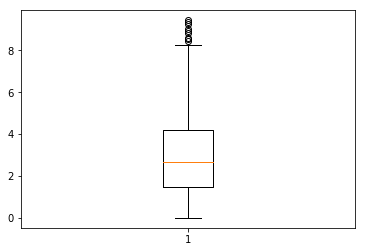

Visualizing features for FGA


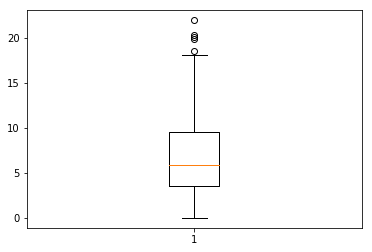

Visualizing features for FG%


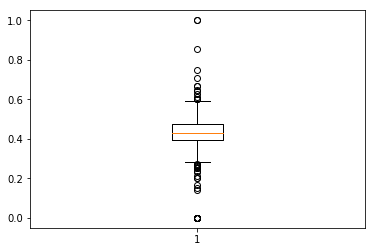

Visualizing features for 3PTM


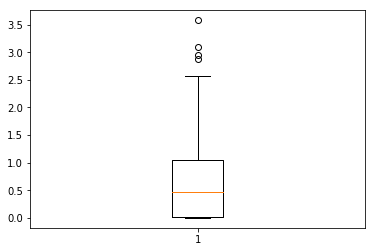

Visualizing features for 3PTA


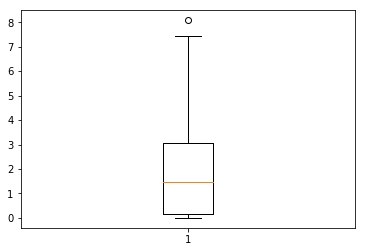

Visualizing features for 3PT%


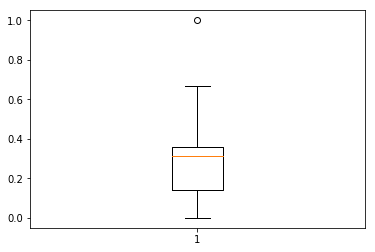

Visualizing features for FTM


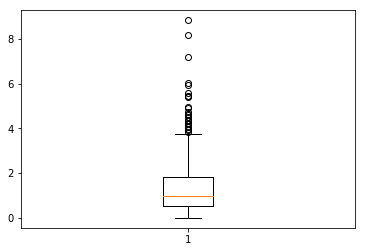

Visualizing features for FTA


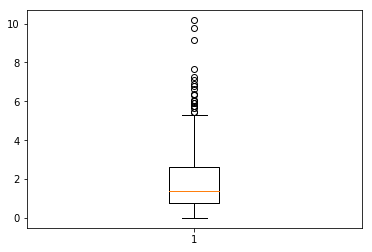

Visualizing features for FT%


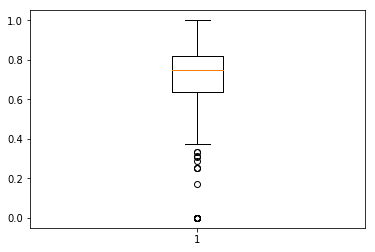

In [11]:
feature_names = df.columns.values[:-1]
for feature_name in feature_names:
    feature_visualization(feature_name, df[feature_name])

In [12]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

,Games,Min,Pts,OReb,Dreb,Reb,Ast,Stl,Blk,TO,PF,FGM,FGA,FG%,3PTM,3PTA,3PT%,FTM,FTA,FT%,Survived
Games,1,0.66,0.54,0.36,0.53,0.5,0.34,0.42,0.31,0.42,0.57,0.55,0.52,0.36,0.32,0.29,0.24,0.39,0.39,0.38,0.39
Min,0.66,1,0.89,0.41,0.72,0.66,0.65,0.75,0.36,0.79,0.7,0.9,0.9,0.26,0.53,0.53,0.35,0.73,0.74,0.36,0.46
Pts,0.54,0.89,1,0.35,0.67,0.6,0.64,0.69,0.32,0.81,0.57,0.99,0.98,0.26,0.55,0.54,0.35,0.89,0.87,0.38,0.43
OReb,0.36,0.41,0.35,1,0.79,0.9,-0.043,0.16,0.72,0.27,0.6,0.42,0.3,0.45,-0.3,-0.32,-0.31,0.34,0.44,-0.015,0.22
Dreb,0.53,0.72,0.67,0.79,1,0.98,0.29,0.45,0.68,0.56,0.71,0.71,0.63,0.4,0.065,0.047,-0.0002,0.59,0.65,0.15,0.37
Reb,0.5,0.66,0.6,0.9,0.98,1,0.19,0.37,0.73,0.49,0.71,0.65,0.55,0.43,-0.055,-0.075,-0.1,0.53,0.61,0.1,0.34
Ast,0.34,0.65,0.64,-0.043,0.29,0.19,1,0.7,-0.038,0.82,0.34,0.62,0.67,0.018,0.45,0.48,0.32,0.59,0.55,0.26,0.28
Stl,0.42,0.75,0.69,0.16,0.45,0.37,0.7,1,0.15,0.72,0.51,0.67,0.7,0.092,0.47,0.5,0.32,0.6,0.6,0.25,0.38
Blk,0.31,0.36,0.32,0.72,0.68,0.73,-0.038,0.15,1,0.21,0.51,0.37,0.26,0.42,-0.2,-0.22,-0.23,0.29,0.37,-0.021,0.24
TO,0.42,0.79,0.81,0.27,0.56,0.49,0.82,0.72,0.21,1,0.58,0.8,0.82,0.16,0.39,0.41,0.26,0.77,0.77,0.27,0.36


Mention the highly correlated features and talk about removing them

# Feature Engineering

Care about how the points were made.

In [33]:
df['3P/T'] = 3*df['3PTM']/(df['Pts'] + 0.00001)
df['FT/T'] = 2*df['FTM']/(df['Pts'] + 0.00001)
df['FG/T'] = 1*df['FGM']/(df['Pts'] + 0.00001)
df = df[[c for c in df if c != 'Survived'] + ['Survived']]
print(df.shape)
df.head()

(496, 24)


,Games,Min,Pts,OReb,Dreb,Reb,Ast,Stl,Blk,TO,...,3PTM,3PTA,3PT%,FTM,FTA,FT%,3P/T,FT/T,FG/T,Survived
0,67,34.36,28.15,1.87,5.45,7.31,8.58,2.09,0.21,4.39,...,1.28,4.30,0.299,8.15,9.76,0.835,0.136412,0.579041,0.332504,1
1,81,36.80,27.37,0.93,4.74,5.67,6.98,1.90,0.74,3.96,...,2.57,6.85,0.375,8.83,10.17,0.868,0.281695,0.645232,0.291925,1
2,27,33.80,25.41,0.59,6.00,6.59,4.07,0.89,0.93,2.74,...,2.37,5.89,0.403,5.41,6.33,0.854,0.279811,0.425816,0.346714,1
3,69,36.14,25.26,0.75,5.30,6.06,7.39,1.58,0.71,3.94,...,1.74,4.93,0.353,5.43,7.65,0.710,0.206651,0.429929,0.357878,1
4,68,36.10,24.35,2.53,7.68,10.21,2.19,1.47,2.94,1.40,...,0.01,0.18,0.083,5.46,6.78,0.805,0.001232,0.448460,0.387680,1


# Algorithm Analysis
knn, SVM, RF+XGB, naive bayes, maybe neural net

In [82]:
scaler = sk.preprocessing.StandardScaler()
# your code goes here
x = df[df.columns[0:-1]]
y = df[df.columns[-1]]
print(f'features shape: {x.shape}')
print(f'labels shape: {y.shape}')
x_train, x_test, y_train, y_test = model_selection.train_test_split(x, y)
# x_train = x.iloc[:-496//5]
# y_train = y.iloc[:-496//5]
print(f'training features shape: {x_train.shape}')
print(f'training labels shape: {y_train.shape}')
# x_test = x.iloc[-496//5:]
# y_test = x.iloc[-496//5:]
print(f'testing features shape: {x_test.shape}')
print(f'testing labels shape: {y_test.shape}')

features shape: (496, 23)
labels shape: (496,)
training features shape: (372, 23)
training labels shape: (372,)
testing features shape: (124, 23)
testing labels shape: (124,)


In [81]:
print(type(x_train))

<class 'pandas.core.frame.DataFrame'>


### SVM Performance Analysis

In [43]:
from sklearn.svm import SVC


param_grid = {'svm__kernel': ['linear', 'rbf', 'poly']}

# svm_ = svm.SVC()
svm_pipeline = sk.pipeline.Pipeline(memory=None, steps=[('scaler', scaler), ('svm', svm.SVC())])
svm_gs = model_selection.GridSearchCV(svm_pipeline, param_grid, scoring="accuracy", cv=5)
svm_cv_results = model_selection.cross_val_score(svm_gs, x, y=y, cv=10)

svm_gs.fit(x, y)

print(f'overall svm accuracy is {svm_cv_results.mean()}')
print(f'best svm model accuracy is {svm_gs.best_score_}')
print(f'best svm params are {svm_gs.best_params_}')

overall svm accuracy is 0.6291964785914365
best svm model accuracy is 0.6189516129032258
best svm params are {'svm__kernel': 'linear'}


In [48]:
best_svm = svm_gs.best_estimator_
best_svm.fit(x, y) 

Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('svm', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False))])

In [49]:
svm_p = model_selection.cross_val_predict(best_svm, x, y=y, cv=10)
print("confusion matrix: ")
print(metrics.confusion_matrix(svm_p, y))
print(metrics.classification_report(svm_p, y))

confusion matrix: 
[[184  90]
 [ 78 144]]
              precision    recall  f1-score   support

           0       0.70      0.67      0.69       274
           1       0.62      0.65      0.63       222

   micro avg       0.66      0.66      0.66       496
   macro avg       0.66      0.66      0.66       496
weighted avg       0.66      0.66      0.66       496



In [72]:
y_pred_svm = best_svm.predict(x_test)
y_pred_svm[:, None].shape

(100,)

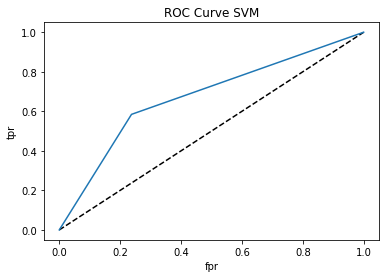

In [83]:
best_svm.fit(x_train, y_train)
y_pred_svm = best_svm.predict(x_test)
#replace these fpr and tpr with the results of your roc_curve
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_svm)


# Do not change this code! This plots the ROC curve.
# Just replace the fpr and tpr above with the values from your roc_curve
plt.plot([0,1],[0,1],'k--') #plot the diagonal line
plt.plot(fpr, tpr, label='SVM') #plot the ROC curve
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC Curve SVM')
plt.show()

### KNN Performance Analysis

In [84]:
from sklearn.neighbors import KNeighborsClassifier

In [88]:
param_grid = {'knn__n_neighbors': list(range(3,20,3))}

knn_pipeline = sk.pipeline.Pipeline(memory=None, steps=[('scaler', scaler), ('knn', KNeighborsClassifier())])
knn_gs = model_selection.GridSearchCV(knn_pipeline, param_grid, scoring="accuracy",cv=5)
knn_cv_results = model_selection.cross_val_score(knn_gs, x, y=y, cv=10)

knn_gs.fit(x, y)

print(f'overall knn accuracy is {knn_cv_results.mean()}')
print(f'best knn model accuracy is {knn_gs.best_score_}')
print(f'best knn params are {knn_gs.best_params_}')

overall knn accuracy is 0.5950252100840336
best knn model accuracy is 0.5060483870967742
best knn params are {'knn__n_neighbors': 6}


In [91]:
best_knn = knn_gs.best_estimator_
best_knn.fit(x_test, y_test)

Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('knn', KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=6, p=2,
           weights='uniform'))])

In [92]:
knn_p = model_selection.cross_val_predict(best_knn, x, y=y, cv=10)
print("confusion matrix: ")
print(metrics.confusion_matrix(knn_p, y))
print(metrics.classification_report(knn_p, y))

confusion matrix: 
[[181 125]
 [ 81 109]]
              precision    recall  f1-score   support

           0       0.69      0.59      0.64       306
           1       0.47      0.57      0.51       190

   micro avg       0.58      0.58      0.58       496
   macro avg       0.58      0.58      0.58       496
weighted avg       0.60      0.58      0.59       496



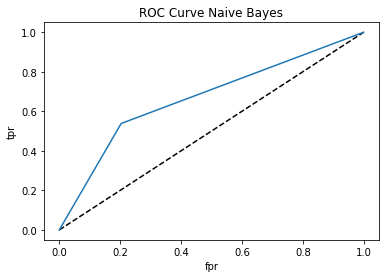

In [98]:
best_knn.fit(x_train, y_train)
y_pred_knn = best_knn.predict(x_test)
#replace these fpr and tpr with the results of your roc_curve
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_knn)


# Do not change this code! This plots the ROC curve.
# Just replace the fpr and tpr above with the values from your roc_curve
plt.plot([0,1],[0,1],'k--') #plot the diagonal line
plt.plot(fpr, tpr, label='NB') #plot the ROC curve
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC Curve Naive Bayes')
plt.show()

### Random Forest Performance Analysis

In [94]:
from sklearn.ensemble import RandomForestClassifier

In [96]:
param_grid = {
    'rf__max_depth': list(range(5,50,5)),
    'rf__min_samples_leaf': [4, 8, 10, 12, 16],
    'rf__max_features': ['sqrt', 'log2']
}

rf_pipeline = sk.pipeline.Pipeline(memory=None, steps=[('scaler', scaler), ('rf', RandomForestClassifier())])
rf_gs = model_selection.GridSearchCV(rf_pipeline, param_grid, scoring="accuracy",cv=5)
rf_cv_results = model_selection.cross_val_score(rf_gs, x, y=y, cv=10)

rf_gs.fit(x,y)

print(f'overall rf accuracy is {rf_cv_results.mean()}')
print(f'best rf model accuracy is {rf_gs.best_score_}')
print(f'best rf params are {rf_gs.best_params_}')

overall rf accuracy is 0.5410564225690276
best rf model accuracy is 0.5362903225806451
best rf params are {'rf__max_depth': 5, 'rf__max_features': 'log2', 'rf__min_samples_leaf': 16}


In [99]:
best_rf = rf_gs.best_estimator_
best_rf.fit(x_test, y_test)

Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('rf', RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='log2', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
         ...obs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False))])

In [100]:
rf_p = model_selection.cross_val_predict(best_rf, x, y=y, cv=10)
print("confusion matrix: ")
print(metrics.confusion_matrix(rf_p, y))
print(metrics.classification_report(rf_p, y))

confusion matrix: 
[[155 114]
 [107 120]]
              precision    recall  f1-score   support

           0       0.59      0.58      0.58       269
           1       0.51      0.53      0.52       227

   micro avg       0.55      0.55      0.55       496
   macro avg       0.55      0.55      0.55       496
weighted avg       0.56      0.55      0.55       496



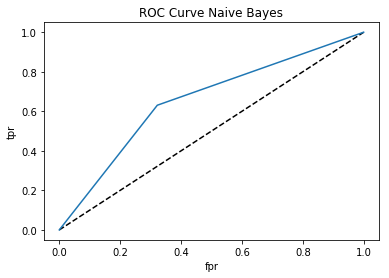

In [108]:
best_rf.fit(x_train, y_train)
y_pred_rf = nb.predict(x_test)
#replace these fpr and tpr with the results of your roc_curve
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_rf)


# Do not change this code! This plots the ROC curve.
# Just replace the fpr and tpr above with the values from your roc_curve
plt.plot([0,1],[0,1],'k--') #plot the diagonal line
plt.plot(fpr, tpr, label='NB') #plot the ROC curve
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC Curve Naive Bayes')
plt.show()

In [109]:
y_pred_rf

array([0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1])

In [110]:
y_test

314    1
174    1
304    0
252    1
11     1
      ..
25     1
51     1
364    0
426    0
97     0
Name: Survived, Length: 124, dtype: int64

### Naïve Bayes Performance Analysis

In [102]:
from sklearn.naive_bayes import GaussianNB

In [103]:
nb = GaussianNB()
results_nb = model_selection.cross_val_score(nb, x, y=y, cv=10)
print(f'naive bayes accuracy {results_nb.mean()}')

naive bayes accuracy 0.694609043617447


In [104]:
cvp = model_selection.cross_val_predict(nb, x, y=y, cv=10)
print("confusion matrix: ")
print(metrics.confusion_matrix(cvp, y))

print(metrics.classification_report(cvp, y))

confusion matrix: 
[[194  84]
 [ 68 150]]
              precision    recall  f1-score   support

           0       0.74      0.70      0.72       278
           1       0.64      0.69      0.66       218

   micro avg       0.69      0.69      0.69       496
   macro avg       0.69      0.69      0.69       496
weighted avg       0.70      0.69      0.69       496



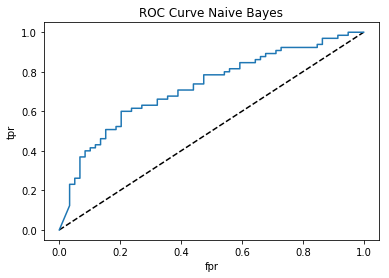

In [106]:
nb.fit(x_train, y_train)
y_pred_nb = nb.predict_proba(x_test)
#replace these fpr and tpr with the results of your roc_curve
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_nb[:,1])


# Do not change this code! This plots the ROC curve.
# Just replace the fpr and tpr above with the values from your roc_curve
plt.plot([0,1],[0,1],'k--') #plot the diagonal line
plt.plot(fpr, tpr, label='NB') #plot the ROC curve
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC Curve Naive Bayes')
plt.show()

# Data Analysis

# Outcome 